In [55]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
train=pd.read_csv('train.tsv',delimiter='\t')
test=pd.read_csv('test.tsv',delimiter='\t')
df=train.append(test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [57]:
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(np.float64)
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [58]:
train_df=df[df['mpg'].notnull()]
test_df=df[df['mpg'].isnull()]

In [59]:
feats_for_poly=[f for f in train_X.columns if f not in ['id','mpg','car name']]
train_df_poly=train_df[feats_for_poly]

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(interaction_only=True,include_bias=False)
train_df_poly=poly.fit_transform(train_df_poly)

In [61]:
poly_columns=poly.get_feature_names(feats_for_poly)

In [62]:
train_df_poly=pd.DataFrame(train_df_poly,columns=poly_columns)

In [63]:
train_df_car=pd.get_dummies(train_df['car name'])

In [74]:
train_df[['id','mpg']]

,id,mpg
0,0,29.0
1,3,31.9
2,9,19.0
3,11,28.0
4,13,37.7
5,16,27.0
6,18,16.0
7,19,11.0
8,23,26.0
9,24,18.2


In [75]:
train_df=pd.concat([train_df_poly,train_df_car,train_df[['id','mpg']]],axis=1)

In [81]:
feats=[f for f in train_df.columns if f not in ['id','mpg']]

In [87]:
import lightgbm as lgb
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances01.png')

In [88]:
from sklearn.model_selection import KFold
folds=KFold(n_splits=10,shuffle=True,random_state=0)

In [89]:
score=np.empty(10)
feature_importance_df = pd.DataFrame()
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats],train_df['mpg'])):
    train_X,train_y=train_df[feats].iloc[train_idx],train_df['mpg'].iloc[train_idx]
    valid_X,valid_y=train_df[feats].iloc[valid_idx],train_df['mpg'].iloc[valid_idx]
    
    gbm_reg=lgb.LGBMRegressor(objective='regression',
                         num_leaves=31,
                         n_estimators=100)
    gbm_reg.fit(train_X,train_y,
               verbose=0)
    pred_y=gbm_reg.predict(valid_X)
    score[n_fold]=mean_absolute_error(pred_y,valid_y)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = gbm_reg.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
score.mean()

2.0898659581803893

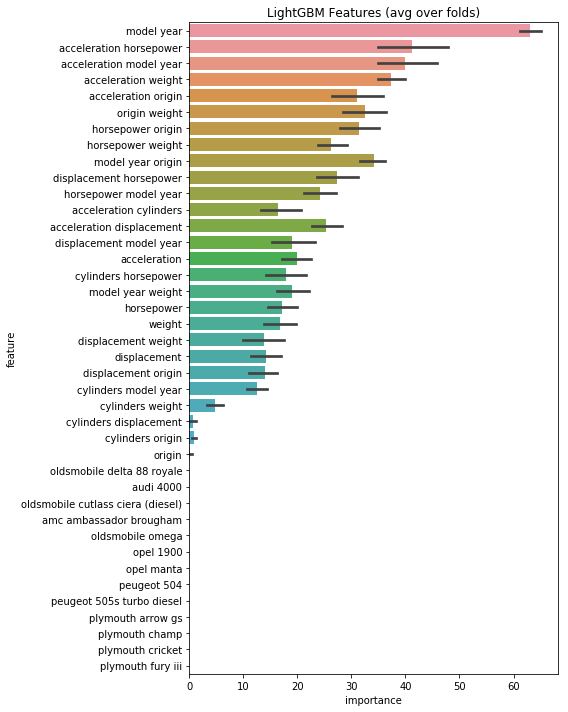

In [91]:
display_importances(feature_importance_df)

In [139]:
train=pd.read_csv('train.tsv',delimiter='\t')
test=pd.read_csv('test.tsv',delimiter='\t')
df=train.append(test)
df['horsepower']=df['horsepower'].replace('?',np.nan)
df['horsepower']=df['horsepower'].astype(np.float64)
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [140]:
feats_for_poly=[f for f in df.columns if f not in ['id','mpg','car name']]
df_poly=df[feats_for_poly]

In [141]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(interaction_only=True,include_bias=False)
df_poly=poly.fit_transform(df_poly)

In [142]:
poly_columns=poly.get_feature_names(feats_for_poly)

In [143]:
df_poly=pd.DataFrame(df_poly,columns=poly_columns)

In [144]:
df_car=pd.get_dummies(df['car name'])

In [149]:
df_poly.shape

(398, 28)

In [155]:
pd.concat([df_poly.head(),df_car.head(),a])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,acceleration,acceleration cylinders,acceleration displacement,acceleration horsepower,acceleration model year,acceleration origin,acceleration weight,amc ambassador brougham,amc ambassador dpl,amc ambassador sst,...,volvo 244dl,volvo 245,volvo 264gl,volvo diesel,vw dasher (diesel),vw pickup,vw rabbit,vw rabbit c (diesel),vw rabbit custom,weight
0,16.0,64.0,2160.0,1344.0,1312.0,16.0,40400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2525.0
1,14.0,56.0,1246.0,994.0,1106.0,28.0,26950.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.0
2,15.5,93.0,2418.0,1674.0,1178.0,46.5,45415.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2930.0
3,14.5,58.0,1305.0,1087.5,1073.0,14.5,30812.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2125.0
4,17.3,69.2,1539.7,1072.6,1401.3,51.9,35465.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2050.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [153]:
df_poly.columns

Index(['acceleration', 'cylinders', 'displacement', 'horsepower', 'model year',
       'origin', 'weight', 'acceleration cylinders',
       'acceleration displacement', 'acceleration horsepower',
       'acceleration model year', 'acceleration origin', 'acceleration weight',
       'cylinders displacement', 'cylinders horsepower',
       'cylinders model year', 'cylinders origin', 'cylinders weight',
       'displacement horsepower', 'displacement model year',
       'displacement origin', 'displacement weight', 'horsepower model year',
       'horsepower origin', 'horsepower weight', 'model year origin',
       'model year weight', 'origin weight'],
      dtype='object')

In [154]:
df_car.columns

Index(['amc ambassador brougham', 'amc ambassador dpl', 'amc ambassador sst',
       'amc concord', 'amc concord d/l', 'amc concord dl', 'amc concord dl 6',
       'amc gremlin', 'amc hornet', 'amc hornet sportabout (sw)',
       ...
       'volvo 145e (sw)', 'volvo 244dl', 'volvo 245', 'volvo 264gl',
       'volvo diesel', 'vw dasher (diesel)', 'vw pickup', 'vw rabbit',
       'vw rabbit c (diesel)', 'vw rabbit custom'],
      dtype='object', length=305)